In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

In [ ]:
smp = pd.read_csv("smpcape.csv")
smp

,Date,SPX Index - 현재가,SMAVG (50),CAPE
0,2024-07-08,NaN,NaN,NaN
1,2024-07-05,5567.19,5310.46,33.89
2,2024-07-04,NaN,NaN,33.76
3,2024-07-03,5537.02,5300.52,33.76
4,2024-07-02,5509.01,5290.00,33.58
...,...,...,...,...
306,2023-05-05,4136.25,NaN,27.05
307,2023-05-04,4061.22,NaN,26.57
308,2023-05-03,4090.75,NaN,26.74
309,2023-05-02,4119.58,NaN,26.93


In [ ]:
smp["Date"] = pd.to_datetime(smp["Date"])
smp.set_index("Date" , inplace = True)
smp

,SPX Index - 현재가,SMAVG (50),CAPE
Date,,,
2024-07-08,NaN,NaN,NaN
2024-07-05,5567.19,5310.46,33.89
2024-07-04,NaN,NaN,33.76
2024-07-03,5537.02,5300.52,33.76
2024-07-02,5509.01,5290.00,33.58
...,...,...,...
2023-05-05,4136.25,NaN,27.05
2023-05-04,4061.22,NaN,26.57
2023-05-03,4090.75,NaN,26.74


In [ ]:
smp = smp.iloc[1:]
smp

,SPX Index - 현재가,SMAVG (50),CAPE
Date,,,
2024-07-05,5567.19,5310.46,33.89
2024-07-04,NaN,NaN,33.76
2024-07-03,5537.02,5300.52,33.76
2024-07-02,5509.01,5290.00,33.58
2024-07-01,5475.09,5279.16,33.38
...,...,...,...
2023-05-05,4136.25,NaN,27.05
2023-05-04,4061.22,NaN,26.57
2023-05-03,4090.75,NaN,26.74


In [ ]:
cape = pd.DataFrame({"CAPE":smp["CAPE"]})
cape

,CAPE
Date,
2024-07-05,33.89
2024-07-04,33.76
2024-07-03,33.76
2024-07-02,33.58
2024-07-01,33.38
...,...
2023-05-05,27.05
2023-05-04,26.57
2023-05-03,26.74


In [ ]:
past_week = cape[0:5]
past_week
values = past_week["CAPE"].values
past_dates = past_week.index

In [ ]:
values

array([33.89, 33.76, 33.76, 33.58, 33.38])

In [ ]:
past_dates

DatetimeIndex(['2024-07-05', '2024-07-04', '2024-07-03', '2024-07-02',
               '2024-07-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

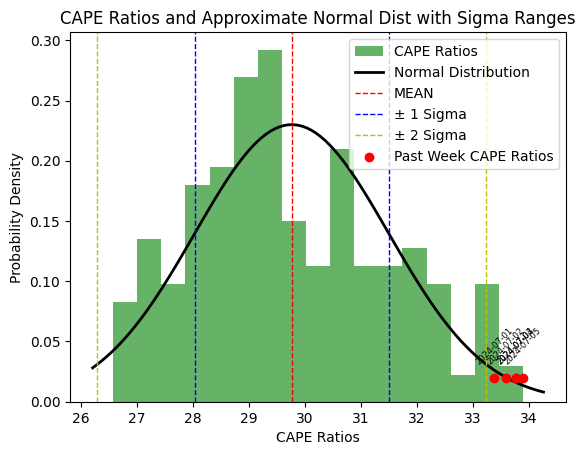

In [ ]:
mean = np.mean(cape['CAPE'])
std = np.std(cape["CAPE"])
num_bins = int(np.sqrt(len(cape)))


plt.hist(cape["CAPE"], bins=num_bins, density = True, alpha = 0.6,color='g', label='CAPE Ratios')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth = 2, label = 'Normal Distribution')

plt.axvline(mean, color = 'r', linestyle = 'dashed', linewidth = 1, label="MEAN")
plt.axvline(mean + std, color = 'b', linestyle ='dashed', linewidth = 1, label='\u00B1 1 Sigma')
plt.axvline (mean - std, color = 'b', linestyle = 'dashed', linewidth = 1)
plt.axvline(mean + 2*std, color = 'y', linestyle = 'dashed', linewidth=1, label='\u00B1 2 Sigma')
plt.axvline(mean - 2*std, color = 'y', linestyle='dashed', linewidth = 1)

y_offset = 0.02
plt.scatter(values, [y_offset]*len(values), color ='red', zorder = 5, label = 'Past Week CAPE Ratios')

for i, txt in enumerate(past_dates):
  plt.annotate(txt.strftime('%Y-%m-%d'), (values[i], y_offset), textcoords = 'offset points', xytext=(0,10), ha='center', fontsize=6, rotation=45)

plt.legend(loc='upper right')
plt.xlabel('CAPE Ratios')
plt.ylabel('Probability Density')
plt.title('CAPE Ratios and Approximate Normal Dist with Sigma Ranges')

plt.show()

In [ ]:
kospi = pd.read_csv("kospi_cape.csv")
kospi

,Date,KOSPI Index - 현재가,SMAVG (50),SMAVG (100),SMAVG (200),장기 주가수익비율 (L1)
0,2024-07-08,2857.76,2733.77,2705.42,2599.48,NaN
1,2024-07-05,2862.23,2729.07,2702.94,2597.93,14.86
2,2024-07-04,2824.94,2724.42,2700.08,2596.36,14.63
3,2024-07-03,2794.01,2719.75,2697.74,2595.05,14.44
4,2024-07-02,2780.86,2716.57,2695.96,2593.99,14.39
...,...,...,...,...,...,...
455,2022-10-07,2232.84,NaN,NaN,NaN,12.30
456,2022-10-06,2237.86,NaN,NaN,NaN,12.31
457,2022-10-05,2215.22,NaN,NaN,NaN,12.21
458,2022-10-04,2209.38,NaN,NaN,NaN,12.18


In [ ]:
kospi = kospi[1:]
kospi

,Date,KOSPI Index - 현재가,SMAVG (50),SMAVG (100),SMAVG (200),장기 주가수익비율 (L1)
1,2024-07-05,2862.23,2729.07,2702.94,2597.93,14.86
2,2024-07-04,2824.94,2724.42,2700.08,2596.36,14.63
3,2024-07-03,2794.01,2719.75,2697.74,2595.05,14.44
4,2024-07-02,2780.86,2716.57,2695.96,2593.99,14.39
5,2024-07-01,2804.31,2712.63,2693.57,2593.01,14.50
...,...,...,...,...,...,...
455,2022-10-07,2232.84,NaN,NaN,NaN,12.30
456,2022-10-06,2237.86,NaN,NaN,NaN,12.31
457,2022-10-05,2215.22,NaN,NaN,NaN,12.21
458,2022-10-04,2209.38,NaN,NaN,NaN,12.18


In [ ]:
kospi["Date"]=pd.to_datetime(kospi["Date"])
kospi.set_index("Date", inplace = True)
kospi

<ipython-input-37-568678b30316>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kospi["Date"]=pd.to_datetime(kospi["Date"])


,KOSPI Index - 현재가,SMAVG (50),SMAVG (100),SMAVG (200),장기 주가수익비율 (L1)
Date,,,,,
2024-07-05,2862.23,2729.07,2702.94,2597.93,14.86
2024-07-04,2824.94,2724.42,2700.08,2596.36,14.63
2024-07-03,2794.01,2719.75,2697.74,2595.05,14.44
2024-07-02,2780.86,2716.57,2695.96,2593.99,14.39
2024-07-01,2804.31,2712.63,2693.57,2593.01,14.50
...,...,...,...,...,...
2022-10-07,2232.84,NaN,NaN,NaN,12.30
2022-10-06,2237.86,NaN,NaN,NaN,12.31
2022-10-05,2215.22,NaN,NaN,NaN,12.21


In [ ]:
kcape = pd.DataFrame({"CAPE":kospi.iloc[:,4]})
kcape

,CAPE
Date,
2024-07-05,14.86
2024-07-04,14.63
2024-07-03,14.44
2024-07-02,14.39
2024-07-01,14.50
...,...
2022-10-07,12.30
2022-10-06,12.31
2022-10-05,12.21


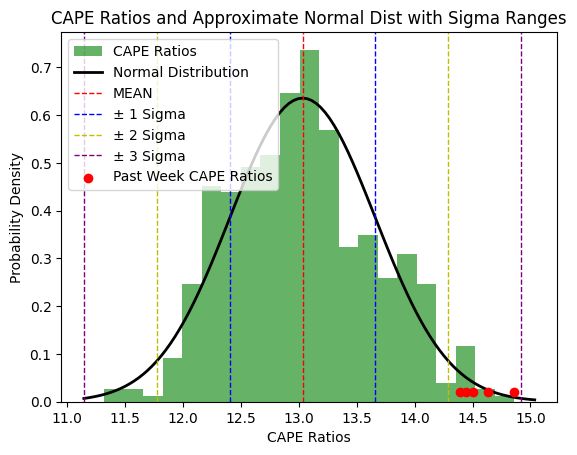

In [ ]:
kmean = np.mean(kcape['CAPE'])
kstd = np.std(kcape["CAPE"])
num_bins = int(np.sqrt(len(kcape)))


plt.hist(kcape["CAPE"], bins=num_bins, density = True, alpha = 0.6,color='g', label='CAPE Ratios')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, kmean, kstd)
plt.plot(x, p, 'k', linewidth = 2, label = 'Normal Distribution')

plt.axvline(kmean, color = 'r', linestyle = 'dashed', linewidth = 1, label="MEAN")
plt.axvline(kmean + kstd, color = 'b', linestyle ='dashed', linewidth = 1, label='\u00B1 1 Sigma')
plt.axvline (kmean - kstd, color = 'b', linestyle = 'dashed', linewidth = 1)
plt.axvline(kmean + 2*kstd, color = 'y', linestyle = 'dashed', linewidth=1, label='\u00B1 2 Sigma')
plt.axvline(kmean - 2*kstd, color = 'y', linestyle='dashed', linewidth = 1)
plt.axvline(kmean + 3*kstd, color = 'purple', linestyle = 'dashed', linewidth=1, label='\u00B1 3 Sigma')
plt.axvline(kmean - 3*kstd, color = 'purple', linestyle='dashed', linewidth = 1)

kvalues = kcape[0:5]["CAPE"].values
datess = kcape[0:5].index

y_offset = 0.02
plt.scatter(kvalues, [y_offset]*len(kvalues), color ='red', zorder = 5, label = 'Past Week CAPE Ratios')

for i, txt in enumerate(datess):
  plt.annotate(txt.strftime('%Y-%m-%d'), (values[i], y_offset), textcoords = 'offset points', xytext=(0,10), ha='center', fontsize=6, rotation=45)

plt.legend(loc='upper left')
plt.xlabel('CAPE Ratios')
plt.ylabel('Probability Density')
plt.title('CAPE Ratios and Approximate Normal Dist with Sigma Ranges')

plt.show()

In [ ]:
ncape = pd.read_csv("nasdaq_cape.csv")
ncape

,Date,NDX Index - 현재가,SMAVG (50),SMAVG (100),SMAVG (200),CAPE
0,2024-07-08,NaN,NaN,NaN,NaN,NaN
1,2024-07-05,20391.97,18819.78,18385.49,17166.28,50.42
2,2024-07-04,NaN,NaN,NaN,NaN,50.34
3,2024-07-03,20186.63,18761.37,18361.20,17140.44,50.34
4,2024-07-02,20011.89,18701.85,18337.16,17115.52,49.90
...,...,...,...,...,...,...
456,2022-10-07,11039.47,NaN,NaN,NaN,35.08
457,2022-10-06,11485.50,NaN,NaN,NaN,36.47
458,2022-10-05,11573.18,NaN,NaN,NaN,36.73
459,2022-10-04,11582.54,NaN,NaN,NaN,36.71


In [ ]:
ncape["Date"] = pd.to_datetime(ncape["Date"])
ncape.set_index("Date", inplace=True)
ncape

,NDX Index - 현재가,SMAVG (50),SMAVG (100),SMAVG (200),CAPE
Date,,,,,
2024-07-08,NaN,NaN,NaN,NaN,NaN
2024-07-05,20391.97,18819.78,18385.49,17166.28,50.42
2024-07-04,NaN,NaN,NaN,NaN,50.34
2024-07-03,20186.63,18761.37,18361.20,17140.44,50.34
2024-07-02,20011.89,18701.85,18337.16,17115.52,49.90
...,...,...,...,...,...
2022-10-07,11039.47,NaN,NaN,NaN,35.08
2022-10-06,11485.50,NaN,NaN,NaN,36.47
2022-10-05,11573.18,NaN,NaN,NaN,36.73


In [ ]:
ncape = ncape.iloc[:,4]
ncape

Date
2024-07-08      NaN
2024-07-05    50.42
2024-07-04    50.34
2024-07-03    50.34
2024-07-02    49.90
              ...  
2022-10-07    35.08
2022-10-06    36.47
2022-10-05    36.73
2022-10-04    36.71
2022-10-03    35.62
Name: CAPE, Length: 461, dtype: float64

In [ ]:
ncape= ncape.iloc[1:,]
ncape

Date
2024-07-05    50.42
2024-07-04    50.34
2024-07-03    50.34
2024-07-02    49.90
2024-07-01    49.38
              ...  
2022-10-07    35.08
2022-10-06    36.47
2022-10-05    36.73
2022-10-04    36.71
2022-10-03    35.62
Name: CAPE, Length: 460, dtype: float64

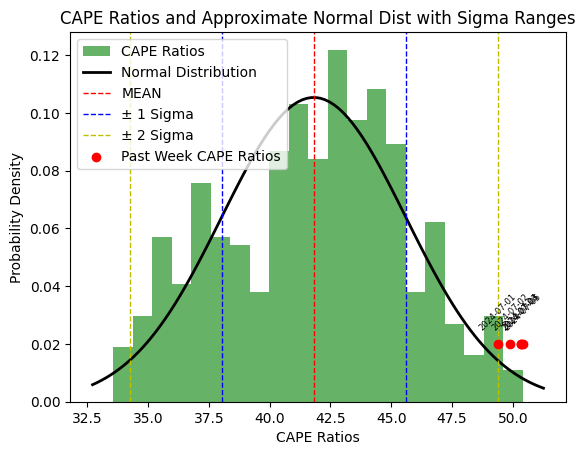

In [ ]:
nmean = np.mean(ncape)
nstd = np.std(ncape)
nnum_bins = int(np.sqrt(len(ncape)))


plt.hist(ncape, bins=nnum_bins, density = True, alpha = 0.6,color='g', label='CAPE Ratios')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, nmean, nstd)
plt.plot(x, p, 'k', linewidth = 2, label = 'Normal Distribution')

plt.axvline(nmean, color = 'r', linestyle = 'dashed', linewidth = 1, label="MEAN")
plt.axvline(nmean + nstd, color = 'b', linestyle ='dashed', linewidth = 1, label='\u00B1 1 Sigma')
plt.axvline (nmean - nstd, color = 'b', linestyle = 'dashed', linewidth = 1)
plt.axvline(nmean + 2*nstd, color = 'y', linestyle = 'dashed', linewidth=1, label='\u00B1 2 Sigma')
plt.axvline(nmean - 2*nstd, color = 'y', linestyle='dashed', linewidth = 1)

nvalues = ncape[0:5].values
nates = ncape[0:5].index

y_offset = 0.02
plt.scatter(nvalues, [y_offset]*len(nvalues), color ='red', zorder = 5, label = 'Past Week CAPE Ratios')

for i, txt in enumerate(nates):
  plt.annotate(txt.strftime('%Y-%m-%d'), (nvalues[i], y_offset), textcoords = 'offset points', xytext=(0,10), ha='center', fontsize=6, rotation=45)

plt.legend(loc='upper left')
plt.xlabel('CAPE Ratios')
plt.ylabel('Probability Density')
plt.title('CAPE Ratios and Approximate Normal Dist with Sigma Ranges')

plt.show()

In [ ]:
nmean

41.812630434782605

In [ ]:
mean

29.760935483870973

In [ ]:
nmean+2*nstd

49.38819924233983

In [ ]:
spx = pd.read_csv("spx.csv")
spx

,Date,SPX Index - 현재가,SMAVG (50),SMAVG (100),SMAVG (200),BEst PER (L1)
0,2024-07-09,NaN,NaN,NaN,NaN,23.0790
1,2024-07-08,5572.85,5320.48,5220.46,4892.79,23.0790
2,2024-07-05,5567.19,5310.46,5214.95,4887.15,23.0490
3,2024-07-04,NaN,NaN,NaN,NaN,22.9283
4,2024-07-03,5537.02,5300.52,5209.54,4881.58,22.9301
...,...,...,...,...,...,...
457,2022-10-07,3639.66,NaN,NaN,NaN,16.3927
458,2022-10-06,3744.52,NaN,NaN,NaN,16.8560
459,2022-10-05,3783.28,NaN,NaN,NaN,17.0339
460,2022-10-04,3790.93,NaN,NaN,NaN,17.0643


In [ ]:
spx["Date"] = pd.to_datetime(spx["Date"])
spx.set_index("Date", inplace= True)
spx

,SPX Index - 현재가,SMAVG (50),SMAVG (100),SMAVG (200),BEst PER (L1)
Date,,,,,
2024-07-09,NaN,NaN,NaN,NaN,23.0790
2024-07-08,5572.85,5320.48,5220.46,4892.79,23.0790
2024-07-05,5567.19,5310.46,5214.95,4887.15,23.0490
2024-07-04,NaN,NaN,NaN,NaN,22.9283
2024-07-03,5537.02,5300.52,5209.54,4881.58,22.9301
...,...,...,...,...,...
2022-10-07,3639.66,NaN,NaN,NaN,16.3927
2022-10-06,3744.52,NaN,NaN,NaN,16.8560
2022-10-05,3783.28,NaN,NaN,NaN,17.0339


In [ ]:
spx = spx[1:]
spx

,SPX Index - 현재가,SMAVG (50),SMAVG (100),SMAVG (200),BEst PER (L1)
Date,,,,,
2024-07-08,5572.85,5320.48,5220.46,4892.79,23.0790
2024-07-05,5567.19,5310.46,5214.95,4887.15,23.0490
2024-07-04,NaN,NaN,NaN,NaN,22.9283
2024-07-03,5537.02,5300.52,5209.54,4881.58,22.9301
2024-07-02,5509.01,5290.00,5204.15,4876.15,22.8116
...,...,...,...,...,...
2022-10-07,3639.66,NaN,NaN,NaN,16.3927
2022-10-06,3744.52,NaN,NaN,NaN,16.8560
2022-10-05,3783.28,NaN,NaN,NaN,17.0339


In [ ]:
per = spx.iloc[:,4]
per

Date
2024-07-08    23.0790
2024-07-05    23.0490
2024-07-04    22.9283
2024-07-03    22.9301
2024-07-02    22.8116
               ...   
2022-10-07    16.3927
2022-10-06    16.8560
2022-10-05    17.0339
2022-10-04    17.0643
2022-10-03    16.5585
Name: BEst PER  (L1), Length: 461, dtype: float64

In [ ]:
perf = per[0:6]
perf

Date
2024-07-08    23.0790
2024-07-05    23.0490
2024-07-04    22.9283
2024-07-03    22.9301
2024-07-02    22.8116
2024-07-01    22.6673
Name: BEst PER  (L1), dtype: float64

In [ ]:
wdates = perf.index
wdates

DatetimeIndex(['2024-07-08', '2024-07-05', '2024-07-04', '2024-07-03',
               '2024-07-02', '2024-07-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

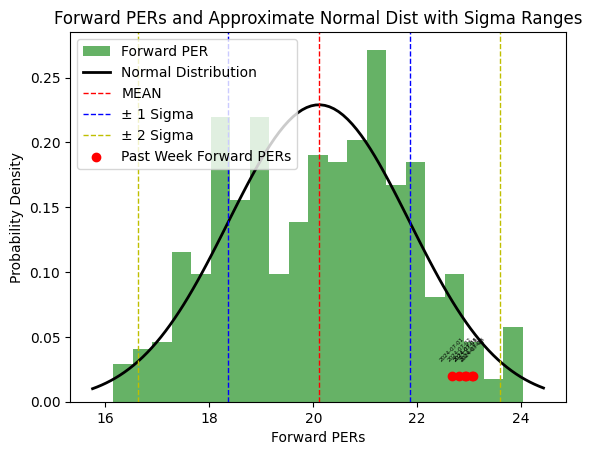

In [ ]:
spmean = np.mean(per)
spstd = np.std(per)
nobins = int(np.sqrt(len(per)))

plt.hist(per, bins = nobins, density = True, alpha = 0.6, color = 'g', label = "Forward PER")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, spmean, spstd)
plt.plot(x, p, 'k', linewidth = 2, label = 'Normal Distribution')

plt.axvline(spmean, color = 'r', linestyle = 'dashed', linewidth = 1, label = 'MEAN')
plt.axvline(spmean+spstd, color = 'b', linestyle = 'dashed', linewidth = 1, label = '\u00B1 1 Sigma')
plt.axvline(spmean - spstd, color = 'b', linestyle = 'dashed', linewidth =1)
plt.axvline(spmean + 2*spstd, color = 'y', linestyle = 'dashed', linewidth =1, label = '\u00B1 2 Sigma')
plt.axvline(spmean - 2*spstd, color = 'y', linestyle = 'dashed', linewidth=1)

y_offset = 0.02
plt.scatter(perf, [y_offset]*len(perf), color = 'red', zorder=5, label = 'Past Week Forward PERs')

for i, txt in enumerate(wdates):
  plt.annotate(txt.strftime('%Y-%m-%d'), (perf[i], y_offset), textcoords = 'offset points', xytext = (0,10), ha='center', fontsize = 4, rotation=45)

plt.legend(loc='upper left')
plt.xlabel('Forward PERs')
plt.ylabel('Probability Density')
plt.title('Forward PERs and Approximate Normal Dist with Sigma Ranges')

plt.show()

In [ ]:
kper = pd.read_csv("nasdaq_per.csv")
kper

,Date,KOSPI Index - 현재가,KOSPI Index - BEst PER
0,2024-07-09,2855.69,11.1860
1,2024-07-08,2857.76,11.1860
2,2024-07-07,NaN,11.2402
3,2024-07-06,NaN,11.2261
4,2024-07-05,2862.23,11.2258
...,...,...,...
361,2023-07-14,2628.30,15.3763
362,2023-07-13,2591.23,15.1360
363,2023-07-12,2574.72,15.0514
364,2023-07-11,2562.49,14.9976


In [ ]:
kper["Date"] = pd.to_datetime(kper["Date"])
kper.set_index("Date", inplace=True)
kper

,KOSPI Index - 현재가,KOSPI Index - BEst PER
Date,,
2024-07-09,2855.69,11.1860
2024-07-08,2857.76,11.1860
2024-07-07,NaN,11.2402
2024-07-06,NaN,11.2261
2024-07-05,2862.23,11.2258
...,...,...
2023-07-14,2628.30,15.3763
2023-07-13,2591.23,15.1360
2023-07-12,2574.72,15.0514


In [ ]:
kper = kper.iloc[:,1]
kper

Date
2024-07-09    11.1860
2024-07-08    11.1860
2024-07-07    11.2402
2024-07-06    11.2261
2024-07-05    11.2258
               ...   
2023-07-14    15.3763
2023-07-13    15.1360
2023-07-12    15.0514
2023-07-11    14.9976
2023-07-10    14.7687
Name: KOSPI Index - BEst PER, Length: 366, dtype: float64

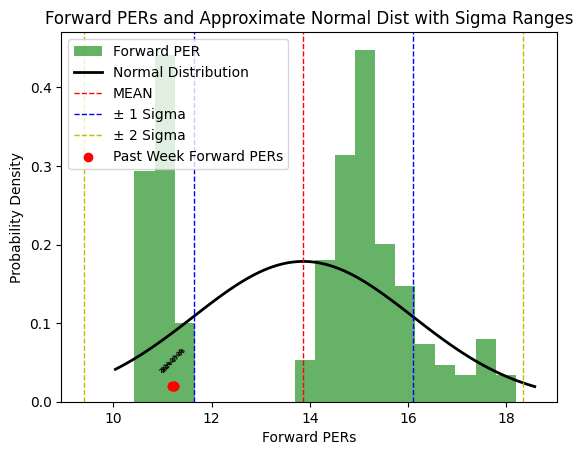

In [ ]:
kpmean = np.mean(kper)
kpstd = np.std(kper)
kpbins = int(np.sqrt(len(kper)))

plt.hist(kper, bins = kpbins, density = True, alpha = 0.6, color = 'g', label = "Forward PER")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, kpmean, kpstd)
plt.plot(x, p, 'k', linewidth = 2, label = 'Normal Distribution')

plt.axvline(kpmean, color = 'r', linestyle = 'dashed', linewidth = 1, label = 'MEAN')
plt.axvline(kpmean+kpstd, color = 'b', linestyle = 'dashed', linewidth = 1, label = '\u00B1 1 Sigma')
plt.axvline(kpmean - kpstd, color = 'b', linestyle = 'dashed', linewidth =1)
plt.axvline(kpmean + 2*kpstd, color = 'y', linestyle = 'dashed', linewidth =1, label = '\u00B1 2 Sigma')
plt.axvline(kpmean - 2*kpstd, color = 'y', linestyle = 'dashed', linewidth=1)

topk = kper[0:5]
kdat = topk.index

y_offset = 0.02
plt.scatter(topk, [y_offset]*len(topk), color = 'red', zorder=5, label = 'Past Week Forward PERs')

for i, txt in enumerate(kdat):
  plt.annotate(txt.strftime('%Y-%m-%d'), (topk[i], y_offset), textcoords = 'offset points', xytext = (0,10), ha='center', fontsize = 4, rotation=45)

plt.legend(loc='upper left')
plt.xlabel('Forward PERs')
plt.ylabel('Probability Density')
plt.title('Forward PERs and Approximate Normal Dist with Sigma Ranges')

plt.show()

In [ ]:
ndq = pd.read_csv("forward.csv")
ndq

,Date,NDX Index - 현재가,NDX Index - BEst PER
0,2024-07-09,NaN,30.3939
1,2024-07-08,20439.54,30.3939
2,2024-07-05,20391.97,30.3237
3,2024-07-04,NaN,30.0248
4,2024-07-03,20186.63,30.0252
...,...,...,...
257,2023-07-14,15565.60,29.7847
258,2023-07-13,15571.98,29.7944
259,2023-07-12,15307.23,29.3100
260,2023-07-11,15119.06,28.9332


In [ ]:
ndq["Date"] = pd.to_datetime(ndq["Date"])
ndq.set_index("Date", inplace = True)
ndq

,NDX Index - 현재가,NDX Index - BEst PER
Date,,
2024-07-09,NaN,30.3939
2024-07-08,20439.54,30.3939
2024-07-05,20391.97,30.3237
2024-07-04,NaN,30.0248
2024-07-03,20186.63,30.0252
...,...,...
2023-07-14,15565.60,29.7847
2023-07-13,15571.98,29.7944
2023-07-12,15307.23,29.3100


In [ ]:
ndqper = ndq.iloc[:,1]
ndqper

Date
2024-07-09    30.3939
2024-07-08    30.3939
2024-07-05    30.3237
2024-07-04    30.0248
2024-07-03    30.0252
               ...   
2023-07-14    29.7847
2023-07-13    29.7944
2023-07-12    29.3100
2023-07-11    28.9332
2023-07-10    28.8013
Name: NDX Index - BEst PER, Length: 262, dtype: float64

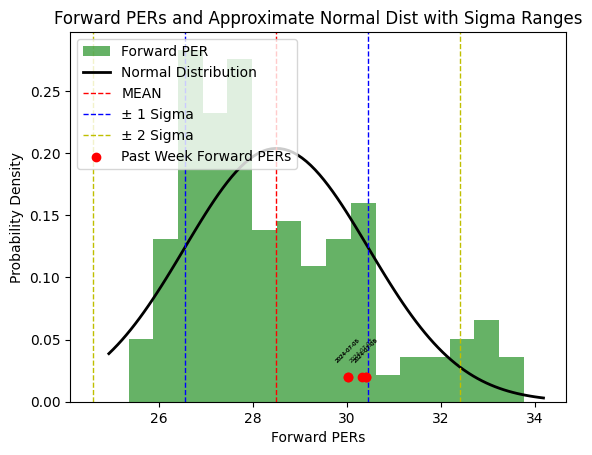

In [ ]:
ndmean = np.mean(ndqper)
ndstd = np.std(ndqper)
ndbins = int(np.sqrt(len(ndqper)))

plt.hist(ndqper, bins = ndbins, density = True, alpha = 0.6, color = 'g', label = "Forward PER")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, ndmean, ndstd)
plt.plot(x, p, 'k', linewidth = 2, label = 'Normal Distribution')

plt.axvline(ndmean, color = 'r', linestyle = 'dashed', linewidth = 1, label = 'MEAN')
plt.axvline(ndmean+ndstd, color = 'b', linestyle = 'dashed', linewidth = 1, label = '\u00B1 1 Sigma')
plt.axvline(ndmean - ndstd, color = 'b', linestyle = 'dashed', linewidth =1)
plt.axvline(ndmean + 2*ndstd, color = 'y', linestyle = 'dashed', linewidth =1, label = '\u00B1 2 Sigma')
plt.axvline(ndmean - 2*ndstd, color = 'y', linestyle = 'dashed', linewidth=1)

topn = ndqper[0:5]
ndat = topn.index

y_offset = 0.02
plt.scatter(topn, [y_offset]*len(topn), color = 'red', zorder=5, label = 'Past Week Forward PERs')

for i, txt in enumerate(kdat):
  plt.annotate(txt.strftime('%Y-%m-%d'), (topn[i], y_offset), textcoords = 'offset points', xytext = (0,10), ha='center', fontsize = 4, rotation=45)

plt.legend(loc='upper left')
plt.xlabel('Forward PERs')
plt.ylabel('Probability Density')
plt.title('Forward PERs and Approximate Normal Dist with Sigma Ranges')

plt.show()